<a href="https://colab.research.google.com/github/Sreenavya-04/PROJECTS/blob/main/MajorProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
df=pd.read_csv('/content/covid_19_clean_complete (1).csv')
df['Date'] = pd.to_datetime(df['Date'])
df = df.drop(columns=['Province/State'])
df = df.rename(columns={'Country/Region': 'Country'})
df = df.sort_values(by=['Date', 'Country'])
country_df = df[df['Country'] == 'India'].copy()
country_df['Date'] = pd.to_datetime(country_df['Date'])
daily_cases = country_df.groupby('Date')['Confirmed'].sum().reset_index()
daily_cases.set_index('Date', inplace=True)
print(df.head())
print(df.info())
print(df.describe())
print(df.isnull().sum())
df= df.drop_duplicates()


       Country       Lat       Long       Date  Confirmed  Deaths  Recovered  \
0  Afghanistan  33.93911  67.709953 2020-01-22          0       0          0   
1      Albania  41.15330  20.168300 2020-01-22          0       0          0   
2      Algeria  28.03390   1.659600 2020-01-22          0       0          0   
3      Andorra  42.50630   1.521800 2020-01-22          0       0          0   
4       Angola -11.20270  17.873900 2020-01-22          0       0          0   

   Active             WHO Region  
0       0  Eastern Mediterranean  
1       0                 Europe  
2       0                 Africa  
3       0                 Europe  
4       0                 Africa  
<class 'pandas.core.frame.DataFrame'>
Index: 49068 entries, 0 to 49035
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Country     49068 non-null  object        
 1   Lat         49068 non-null  float64       
 2   Long     

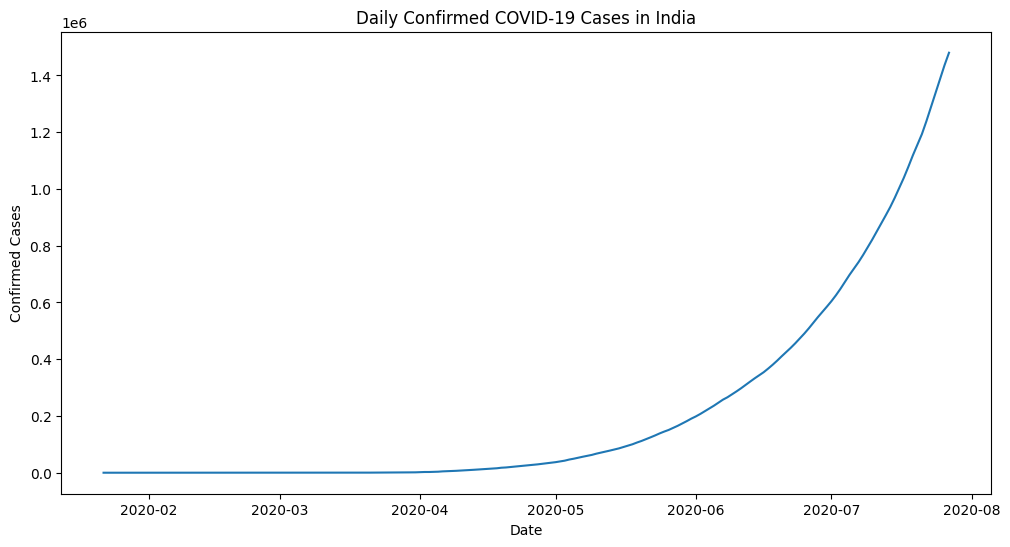

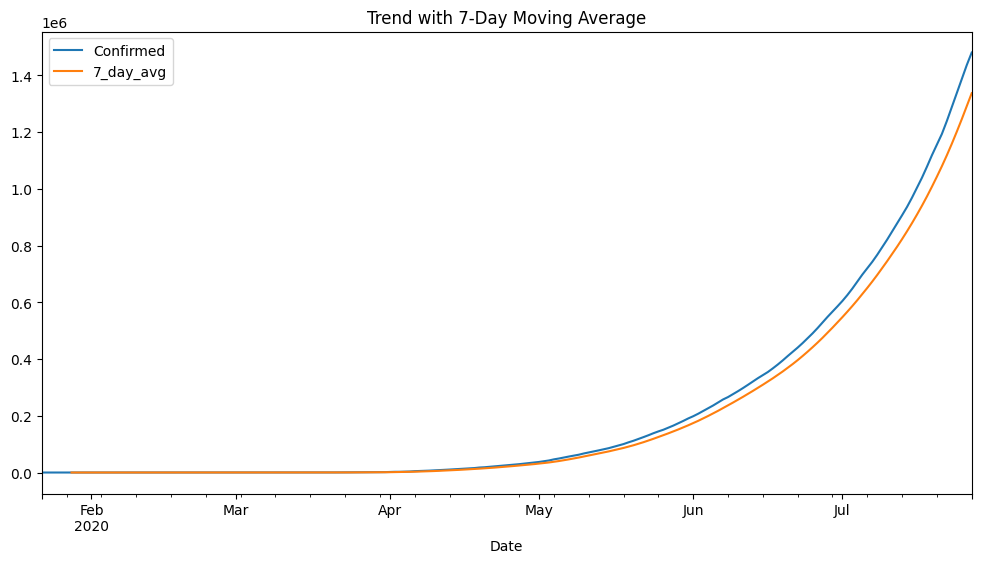

In [17]:
# Plot time series
plt.figure(figsize=(12, 6))
sns.lineplot(data=daily_cases, x='Date', y='Confirmed')
plt.title('Daily Confirmed COVID-19 Cases in India')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.show()

daily_cases['7_day_avg'] = daily_cases['Confirmed'].rolling(window=7).mean()
daily_cases[['Confirmed', '7_day_avg']].plot(figsize=(12, 6), title='Trend with 7-Day Moving Average')
plt.show()

In [31]:
train = daily_cases[:-30]
test = daily_cases[-30:]
print("Train set length:", len(train))
print("Test set length:", len(test))
print("\nTrain date range:", train.index.min().date(), "to", train.index.max().date())
print("Test date range:", test.index.min().date(), "to", test.index.max().date())

print("\nLast 5 train values:")
print(train.tail())

print("\nFirst 5 test values:")
print(test.head())

Train set length: 158
Test set length: 30

Train date range: 2020-01-22 to 2020-06-27
Test date range: 2020-06-28 to 2020-07-27

Last 5 train values:
            Confirmed      7_day_avg
Date                                
2020-06-23     456183  410665.285714
2020-06-24     473105  425830.857143
2020-06-25     490401  441526.428571
2020-06-26     508953  457798.571429
2020-06-27     528859  474714.000000

First 5 test values:
            Confirmed      7_day_avg
Date                                
2020-06-28     548318  492290.571429
2020-06-29     566840  510379.857143
2020-06-30     585481  528851.000000
2020-07-01     604641  547641.857143
2020-07-02     625544  566948.000000


In [19]:
# Fit ARIMA
model_arima = ARIMA(train['Confirmed'], order=(5,1,0))
results_arima = model_arima.fit()

# Forecast
forecast_arima = results_arima.forecast(steps=30)

# Evaluate
rmse_arima = np.sqrt(mean_squared_error(test['Confirmed'], forecast_arima))
mape_arima = mean_absolute_percentage_error(test['Confirmed'], forecast_arima)

print(f'ARIMA RMSE: {rmse_arima:.2f}, MAPE: {mape_arima:.2%}')

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


ARIMA RMSE: 122055.77, MAPE: 6.48%


In [20]:
# Fit SARIMAX with weekly seasonality
model_sarimax = SARIMAX(train['Confirmed'], order=(1,1,1), seasonal_order=(1,1,1,7))
results_sarimax = model_sarimax.fit()

# Forecast
forecast_sarimax = results_sarimax.forecast(steps=30)

# Evaluate
rmse_sarimax = np.sqrt(mean_squared_error(test['Confirmed'], forecast_sarimax))
mape_sarimax = mean_absolute_percentage_error(test['Confirmed'], forecast_sarimax)

print(f'SARIMAX RMSE: {rmse_sarimax:.2f}, MAPE: {mape_sarimax:.2%}')

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible

SARIMAX RMSE: 69680.33, MAPE: 3.58%


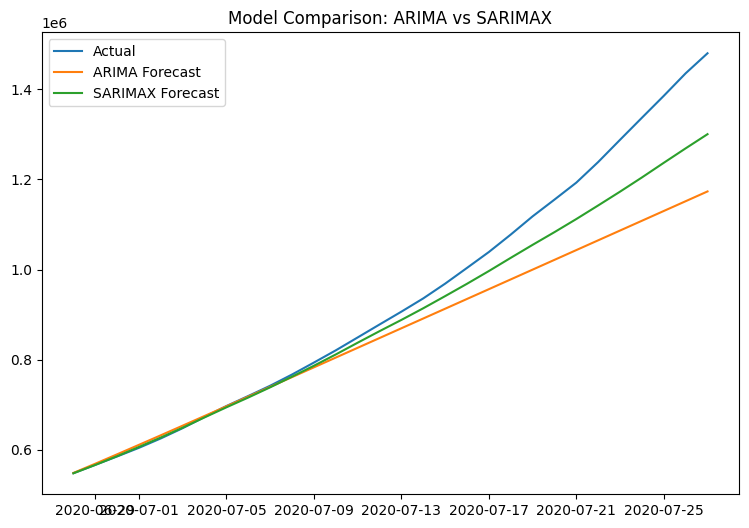

In [23]:
plt.figure(figsize=(9, 6))
plt.plot(test.index, test['Confirmed'], label='Actual')
plt.plot(test.index, forecast_arima, label='ARIMA Forecast')
plt.plot(test.index, forecast_sarimax, label='SARIMAX Forecast')
plt.title('Model Comparison: ARIMA vs SARIMAX')
plt.legend()
plt.show()

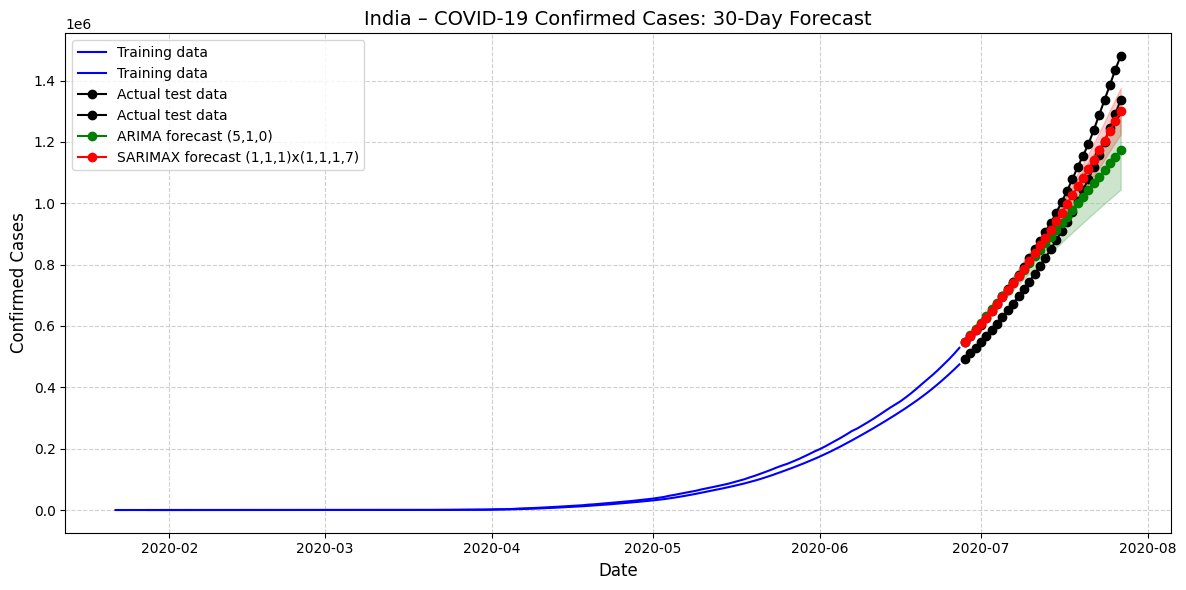

In [30]:
arima_forecast_obj = results_arima.get_forecast(steps=30)
arima_forecast_mean = arima_forecast_obj.predicted_mean
arima_conf_int = arima_forecast_obj.conf_int()

# Get 30-day ahead forecasts for SARIMAX
sarimax_forecast_obj = results_sarimax.get_forecast(steps=30)
sarimax_forecast_mean = sarimax_forecast_obj.predicted_mean
sarimax_conf_int = sarimax_forecast_obj.conf_int()


plt.figure(figsize=(12, 6))

# Historical data
plt.plot(train.index, train, label="Training data", color="blue")
plt.plot(test.index, test, label="Actual test data", marker="o", color="black")

# ARIMA forecast
plt.plot(test.index, arima_forecast_mean, label="ARIMA forecast (5,1,0)", marker="o", color="green")
plt.fill_between(test.index,
                 arima_conf_int.iloc[:, 0],
                 arima_conf_int.iloc[:, 1],
                 color="green", alpha=0.2)

# SARIMAX forecast
plt.plot(test.index, sarimax_forecast_mean, label="SARIMAX forecast (1,1,1)x(1,1,1,7)", marker="o", color="red")
plt.fill_between(test.index,
                 sarimax_conf_int.iloc[:, 0],
                 sarimax_conf_int.iloc[:, 1],
                 color="red", alpha=0.2)

plt.title("India – COVID-19 Confirmed Cases: 30-Day Forecast", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Confirmed Cases", fontsize=12)
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()
